### Import dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Import data 

In [3]:
data=pd.read_excel("ageing.xlsx")

### Look at data 

In [4]:
data.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,...,Final Age,Age dif,Z age,L age,B age,K&M Age,K age,M age,Notes,Unnamed: 21
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,...,14.0,0,NaN,14.0,14,14,14.0,12.0,NaN,NaN
1,Amblema,plicata,6,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,...,10.0,1,NaN,10.0,11,15,15.0,10.0,NaN,NaN
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,...,14.0,1,NaN,14.0,13,15,15.0,11.0,NaN,NaN
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,...,7.0,2,NaN,9.0,7,12,12.0,9.0,NaN,NaN
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,...,10.0,1,NaN,11.0,10,11,11.0,11.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Genus                   449 non-null    object        
 1   Species                 449 non-null    object        
 2   Sample ID               449 non-null    int64         
 3   Species Code            449 non-null    object        
 4   Site                    449 non-null    object        
 5   River                   449 non-null    object        
 6   Basin                   449 non-null    object        
 7   Lat                     449 non-null    object        
 8   Long                    449 non-null    object        
 9   Date Collected          449 non-null    datetime64[ns]
 10  Length (mm)             449 non-null    float64       
 11  Status Upon Collection  449 non-null    object        
 12  Final Age               449 non-null    float64   

In [6]:
data["Final Age"]=pd.to_numeric(data["Final Age"], errors="coerce")

In [7]:
data["B age"]=pd.to_numeric(data["B age"], errors="coerce")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Genus                   449 non-null    object        
 1   Species                 449 non-null    object        
 2   Sample ID               449 non-null    int64         
 3   Species Code            449 non-null    object        
 4   Site                    449 non-null    object        
 5   River                   449 non-null    object        
 6   Basin                   449 non-null    object        
 7   Lat                     449 non-null    object        
 8   Long                    449 non-null    object        
 9   Date Collected          449 non-null    datetime64[ns]
 10  Length (mm)             449 non-null    float64       
 11  Status Upon Collection  449 non-null    object        
 12  Final Age               449 non-null    float64   

In [9]:
for col in data.columns:
    print(col)

Genus
Species
Sample ID
Species Code
Site
River
Basin
Lat
Long
Date Collected
Length (mm)
Status Upon Collection
Final Age
Age dif
Z age
L age
B age
K&M Age
K age
M age
Notes
Unnamed: 21


In [10]:
data["Genus"].value_counts()

Amblema      304
Lampsilis    145
Name: Genus, dtype: int64

In [11]:
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 449, column : 22


### Drop col: "Unnamed: , K age, K&M age, Notes"

In [13]:
drop=data.drop(columns=["Notes","Unnamed: 21","K age", ])

### Look at data

In [14]:
drop.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age,M age
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,77.0,Alive,14.0,0,NaN,14.0,14.0,14,12.0
1,Amblema,plicata,6,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,79.0,Alive,10.0,1,NaN,10.0,11.0,15,10.0
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,82.5,Alive,14.0,1,NaN,14.0,13.0,15,11.0
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,75.5,Alive,7.0,2,NaN,9.0,7.0,12,9.0
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,78.5,Alive,10.0,1,NaN,11.0,10.0,11,11.0


## *Lampsilis teres*

### Drop data that isn't *Lampsilis*

In [15]:
lampsilis=drop[drop["Genus"]=="Lampsilis"]

In [16]:
lampsilis.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age,M age
259,Lampsilis,teres,297,E,"Altair, TX",Colorado,Colorado,29.595299°,-96.453229°,2019-10-03,128.0,Alive,6.0,0,6.0,6.0,NaN,NaN,17.0
260,Lampsilis,teres,299,E,"Altair, TX",Colorado,Colorado,29.595299°,-96.453229°,2019-10-03,81.0,Alive,5.0,2,NaN,5.0,3.0,3,0.0
261,Lampsilis,teres,300,E,"Altair, TX",Colorado,Colorado,29.595299°,-96.453229°,2019-10-03,125.0,Alive,5.0,0,5.0,5.0,NaN,NaN,8.0
262,Lampsilis,teres,301,E,"Altair, TX",Colorado,Colorado,29.595299°,-96.453229°,2019-10-03,115.0,Alive,7.0,1,NaN,7.0,8.0,NaN,11.0
263,Lampsilis,teres,302,E,"Altair, TX",Colorado,Colorado,29.595299°,-96.453229°,2019-10-03,121.0,Alive,5.0,0,NaN,5.0,5.0,6,10.0


### Drop agers K & M b/c not involved in the *Lampsilis* ageing 

In [17]:
lampsilis_drop=lampsilis.drop(columns=["M age"])
lampsilis_drop.head()
lampsilis_drop.isna()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age
259,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
260,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
261,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
262,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
263,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
428,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
429,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Drop subset of nan's across agers

In [18]:
lampsilis_clean=lampsilis_drop.dropna(subset=["Final Age", "Z age", "L age", "B age"])

In [19]:
lampsilis_clean.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age
293,Lampsilis,teres,336,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,139.0,Alive,5.0,0,5.0,5.0,5.0,NaN
294,Lampsilis,teres,337,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,121.0,Alive,6.0,3,6.0,9.0,6.0,NaN
295,Lampsilis,teres,338,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,141.0,Alive,4.0,0,4.0,4.0,4.0,NaN
296,Lampsilis,teres,339,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,107.0,Alive,4.0,1,4.0,5.0,4.0,NaN
297,Lampsilis,teres,340,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,111.0,Alive,3.0,0,3.0,3.0,3.0,NaN


In [20]:
#Add avg age from agers col for figures

In [21]:
# lampsilis_clean['avg_age'] = (lampsilis_clean['Z age'] + lampsilis_clean['L age'] + lampsilis_clean['B age'] ) / 3

#### Ready for visualizations

In [22]:
lampsilis_clean.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age
293,Lampsilis,teres,336,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,139.0,Alive,5.0,0,5.0,5.0,5.0,NaN
294,Lampsilis,teres,337,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,121.0,Alive,6.0,3,6.0,9.0,6.0,NaN
295,Lampsilis,teres,338,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,141.0,Alive,4.0,0,4.0,4.0,4.0,NaN
296,Lampsilis,teres,339,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,107.0,Alive,4.0,1,4.0,5.0,4.0,NaN
297,Lampsilis,teres,340,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,111.0,Alive,3.0,0,3.0,3.0,3.0,NaN


In [24]:
lampsilis_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 293 to 430
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Genus                   127 non-null    object        
 1   Species                 127 non-null    object        
 2   Sample ID               127 non-null    int64         
 3   Species Code            127 non-null    object        
 4   Site                    127 non-null    object        
 5   River                   127 non-null    object        
 6   Basin                   127 non-null    object        
 7   Lat                     127 non-null    object        
 8   Long                    127 non-null    object        
 9   Date Collected          127 non-null    datetime64[ns]
 10  Length (mm)             127 non-null    float64       
 11  Status Upon Collection  127 non-null    object        
 12  Final Age               127 non-null    float64 

In [25]:
lampsilis_melt=pd.melt(lampsilis_clean, id_vars=["Sample ID", "Final Age"], value_vars=["Z age", "L age", "B age"], var_name="ager", value_name="age")

In [26]:
lampsilis_melt.head()

,Sample ID,Final Age,ager,age
0,336,5.0,Z age,5.0
1,337,6.0,Z age,6.0
2,338,4.0,Z age,4.0
3,339,4.0,Z age,4.0
4,340,3.0,Z age,3.0


In [27]:
lampsilis_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample ID  381 non-null    int64  
 1   Final Age  381 non-null    float64
 2   ager       381 non-null    object 
 3   age        381 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.0+ KB


In [28]:
# lampsilis_melt["avg_age"]=pd.to_numeric(lampsilis_melt["avg_age"], errors="coerce")

In [29]:
# lampsilis_melt["age"]=pd.to_numeric(lampsilis_melt["age"], errors="coerce")

## *Amblema plicata* same process as above ^

In [30]:
amblema=drop
amblema.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age,M age
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,77.0,Alive,14.0,0,NaN,14.0,14.0,14,12.0
1,Amblema,plicata,6,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,79.0,Alive,10.0,1,NaN,10.0,11.0,15,10.0
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,82.5,Alive,14.0,1,NaN,14.0,13.0,15,11.0
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,75.5,Alive,7.0,2,NaN,9.0,7.0,12,9.0
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,78.5,Alive,10.0,1,NaN,11.0,10.0,11,11.0


### Filter for only *Amblema plicata* data

In [31]:
amblema=amblema[amblema["Genus"]=="Amblema"]

In [32]:
amblema.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age,M age
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,77.0,Alive,14.0,0,NaN,14.0,14.0,14,12.0
1,Amblema,plicata,6,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,79.0,Alive,10.0,1,NaN,10.0,11.0,15,10.0
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,82.5,Alive,14.0,1,NaN,14.0,13.0,15,11.0
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,75.5,Alive,7.0,2,NaN,9.0,7.0,12,9.0
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,78.5,Alive,10.0,1,NaN,11.0,10.0,11,11.0


### Drop agers Z & L b/c not involved in *A. plicata* ageing (soon will change to include L data)

In [33]:
amblema=amblema.drop(columns=["Z age"])
amblema.head()
amblema.isna()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,L age,B age,K&M Age,M age
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
447,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


### Drop Nan's across agers

In [34]:
amblema=amblema.dropna(subset=["Final Age","L age","B age", "M age"])

In [35]:
amblema.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,L age,B age,K&M Age,M age
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,77.0,Alive,14.0,0,14.0,14.0,14,12.0
1,Amblema,plicata,6,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,79.0,Alive,10.0,1,10.0,11.0,15,10.0
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,82.5,Alive,14.0,1,14.0,13.0,15,11.0
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,75.5,Alive,7.0,2,9.0,7.0,12,9.0
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,78.5,Alive,10.0,1,11.0,10.0,11,11.0


In [36]:
amblema=amblema[amblema!=0]
amblema

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,L age,B age,K&M Age,M age
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,77.0,Alive,14.0,NaN,14.0,14.0,14,12.0
1,Amblema,plicata,6,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,79.0,Alive,10.0,1.0,10.0,11.0,15,10.0
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,82.5,Alive,14.0,1.0,14.0,13.0,15,11.0
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,75.5,Alive,7.0,2.0,9.0,7.0,12,9.0
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,78.5,Alive,10.0,1.0,11.0,10.0,11,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Amblema,plicata,328,D,"Victoria, TX",Guadalupe,Guadalupe,28.832985°,-97.064802°,2019-09-04,63.0,Alive,8.0,2.0,8.0,10.0,12,12.0
289,Amblema,plicata,329,D,"Victoria, TX",Guadalupe,Guadalupe,28.832985°,-97.064802°,2019-09-04,69.0,Alive,10.0,1.0,11.0,10.0,11,11.0
290,Amblema,plicata,330,D,"Victoria, TX",Guadalupe,Guadalupe,28.832985°,-97.064802°,2019-09-04,67.0,Alive,10.0,2.0,9.0,11.0,10,9.0
291,Amblema,plicata,332,D,"Victoria, TX",Guadalupe,Guadalupe,28.832985°,-97.064802°,2019-09-04,91.0,Alive,10.0,NaN,10.0,10.0,11,11.0


In [37]:
amblema=amblema.dropna(subset=["Final Age"])

In [38]:
amblema

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,L age,B age,K&M Age,M age
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,77.0,Alive,14.0,NaN,14.0,14.0,14,12.0
1,Amblema,plicata,6,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,79.0,Alive,10.0,1.0,10.0,11.0,15,10.0
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,82.5,Alive,14.0,1.0,14.0,13.0,15,11.0
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,75.5,Alive,7.0,2.0,9.0,7.0,12,9.0
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,78.5,Alive,10.0,1.0,11.0,10.0,11,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Amblema,plicata,328,D,"Victoria, TX",Guadalupe,Guadalupe,28.832985°,-97.064802°,2019-09-04,63.0,Alive,8.0,2.0,8.0,10.0,12,12.0
289,Amblema,plicata,329,D,"Victoria, TX",Guadalupe,Guadalupe,28.832985°,-97.064802°,2019-09-04,69.0,Alive,10.0,1.0,11.0,10.0,11,11.0
290,Amblema,plicata,330,D,"Victoria, TX",Guadalupe,Guadalupe,28.832985°,-97.064802°,2019-09-04,67.0,Alive,10.0,2.0,9.0,11.0,10,9.0
291,Amblema,plicata,332,D,"Victoria, TX",Guadalupe,Guadalupe,28.832985°,-97.064802°,2019-09-04,91.0,Alive,10.0,NaN,10.0,10.0,11,11.0


In [166]:
amblema=amblema.dropna(subset=["M age", "B age", "L age"])

### Pivot ager data vertically 

In [167]:
amblema_melt=pd.melt(amblema, id_vars=["Sample ID", "Final Age"], value_vars=["L age", "M age", "B age"], var_name="ager", value_name="age")

### Look at data

In [40]:
amblema_melt.head()

,Sample ID,Final Age,ager,age
0,5,14.0,L age,14.0
1,6,10.0,L age,10.0
2,7,14.0,L age,14.0
3,8,7.0,L age,9.0
4,9,10.0,L age,11.0


### Check datatypes

In [41]:
amblema_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample ID  843 non-null    int64  
 1   Final Age  843 non-null    float64
 2   ager       843 non-null    object 
 3   age        836 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 26.5+ KB


In [42]:
### Add new column with avg. mussel age from the agers

In [43]:
# amblema['avg_age'] = (amblema['B age'] + amblema['K age'] + amblema['M age'] ) / 3

In [44]:
# amblema.head()

### Ready for figures 

In [45]:
lampsilis_clean.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age
293,Lampsilis,teres,336,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,139.0,Alive,5.0,0,5.0,5.0,5.0,NaN
294,Lampsilis,teres,337,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,121.0,Alive,6.0,3,6.0,9.0,6.0,NaN
295,Lampsilis,teres,338,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,141.0,Alive,4.0,0,4.0,4.0,4.0,NaN
296,Lampsilis,teres,339,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,107.0,Alive,4.0,1,4.0,5.0,4.0,NaN
297,Lampsilis,teres,340,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,111.0,Alive,3.0,0,3.0,3.0,3.0,NaN


### *Lampsilis teres regressions for agers*

## Z:L

In [297]:
ztol=lampsilis_clean[["Z age", "L age", "Final Age"]]
ztol.head()
# ztol=pd.melt(ztol, id_vars=[], value_vars=["Z age", "L age"], var_name="ager", value_name="age")
# ztol.head()

,Z age,L age,Final Age
293,5.0,5.0,5.0
294,6.0,9.0,6.0
295,4.0,4.0,4.0
296,4.0,5.0,4.0
297,3.0,3.0,3.0


<Figure size 842.4x595.44 with 0 Axes>

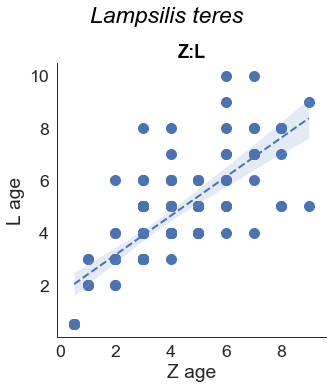

In [47]:
plt.figure(figsize=(11.7, 8.27))

fontdict={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

sns.set_context('paper', font_scale=2) #this makes the font and scatterpoints much smaller, hence the need for size adjustemnts
sns.set_style('white')

lm=sns.lmplot(x='Z age', 
              y='L age',
              scatter=True,
              data=ztol, 
              fit_reg=True,
#               logx=True, if needs to be transformed logx
              truncate=True,
              legend='full',
              markers=['o',], #'o','s'
              palette=("PuBuGn_d"),
              scatter_kws={"s":100,'alpha':1},
              line_kws={"lw":2,
                        'ls':'--'})

fig=lm.fig


fig.suptitle('Lampsilis teres', style='italic',fontdict=fontdict, color='black', position=(0.5,1.1))
a1 = fig.axes[0]
a1.set_title("Z:L",fontdict=fontdict, color='black')
# a2=fig.axes[1]
# a2.set_title("L",fontdict=fontdict, color='black')
# a3=fig.axes[2]
# a3.set_title("B",fontdict=fontdict, color='black')
fig.savefig("Z:L_teres.png")

## Z:B

<Figure size 842.4x595.44 with 0 Axes>

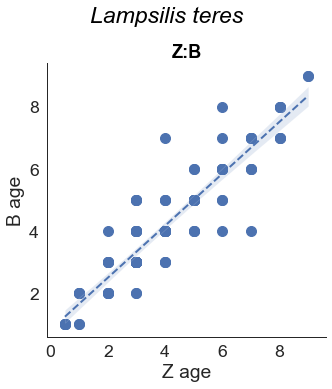

In [48]:
plt.figure(figsize=(11.7, 8.27))

fontdict={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

sns.set_context('paper', font_scale=2) #this makes the font and scatterpoints much smaller, hence the need for size adjustemnts
sns.set_style('white')

lm=sns.lmplot(x='Z age', 
           y='B age', 
#          hue='ager', 
#          col='ager',
           data=lampsilis_clean, 
           legend='full', 
           markers=['o',], #'o','s'
           palette=['#1f78b4'], #'#EE442F','#63acbe','#601a41' #'#4daf4a','#1f78b4','#e41a1c'
           scatter_kws={"s":100,'alpha':1},
           line_kws={"lw":2,
                     'ls':'--'})
fig=lm.fig

fig.suptitle('Lampsilis teres', style='italic',fontdict=fontdict, color='black', position=(0.5,1.1))
a1 = fig.axes[0]
a1.set_title("Z:B",fontdict=fontdict, color='black')
# a2=fig.axes[1]
# a2.set_title("L",fontdict=fontdict, color='black')
# a3=fig.axes[2]
# a3.set_title("B",fontdict=fontdict, color='black')

fig.savefig("Z:B_teres.png")

In [49]:
lampsilis_melt.head()

,Sample ID,Final Age,ager,age
0,336,5.0,Z age,5.0
1,337,6.0,Z age,6.0
2,338,4.0,Z age,4.0
3,339,4.0,Z age,4.0
4,340,3.0,Z age,3.0


In [50]:
lampsilis_clean.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,Z age,L age,B age,K&M Age
293,Lampsilis,teres,336,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,139.0,Alive,5.0,0,5.0,5.0,5.0,NaN
294,Lampsilis,teres,337,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,121.0,Alive,6.0,3,6.0,9.0,6.0,NaN
295,Lampsilis,teres,338,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,141.0,Alive,4.0,0,4.0,4.0,4.0,NaN
296,Lampsilis,teres,339,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,107.0,Alive,4.0,1,4.0,5.0,4.0,NaN
297,Lampsilis,teres,340,E,"Bay City, TX",Colorado,Colorado,29.126034°,-96.044864°,2020-05-05,111.0,Alive,3.0,0,3.0,3.0,3.0,NaN


In [217]:
# import plotly.express as px
# fig =px.scatter(lampsilis_melt,
#                 x="Final Age",
#                 y="age",
#                 color="ager",
#                 width=600,
#                 height=400, 
#                 trendline="ols",
#                 template="simple_white")
# fig.show()

In [218]:
# import statsmodels.api as sm
# import plotly.graph_objs as go

# # choose the figure font
# font_dict=dict(family='Arial',
#                size=26,
#                color='black'
#                )


# # your original setup
# fig = px.scatter(lampsilis_clean,
#     x="Final Age",
#     y="Z age",
# #     facet_col="ager",             
#     width=600,
#     height=400,           
#     template="simple_white",
# #     trendline="ols",
#     trendline_color_override="red",
#     category_orders={"ager": ["L age", "B age", "Z age"]}
# )

# fig.for_each_annotation(lambda a: a.update(text=a.text.replace("ager=Z age", "3")))
# fig.for_each_annotation(lambda a: a.update(text=a.text.replace("ager=L age", "1")))
# fig.for_each_annotation(lambda a: a.update(text=a.text.replace("ager=B age", "2")))
# # linear regression
# regline = sm.OLS(lampsilis_melt["age"],sm.add_constant(lampsilis_melt["Final Age"])).fit().fittedvalues

# # # add linear regression line for whole sample
# fig.add_traces(go.Scatter(x=lampsilis_melt["Final Age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trend all',
#                         )
#                           )
# fig.update_layout(showlegend=True) 

# fig

In [219]:
# trace0 = go.Scatter(
#     x=lampsilis_clean["Final Age"],
#     y=lampsilis_clean["Z age"],
# #     facet_col="ager",             
# #     width=600,
# #     height=400,           
# #     template="simple_white",
# #     trendline="ols",
# #     trendline_color_override="red",
#     name="3",
#     mode="markers",
# )

# trace1 = go.Scatter(
#     x=lampsilis_clean["Final Age"],
#     y=lampsilis_clean["B age"],
# #     facet_col="ager",             
# #     width=600,
# #     height=400,           
# #     template="simple_white",
#     name="2",
#     mode="markers"
# )
# trace2 = go.Scatter(
#     x=lampsilis_clean["Final Age"],
#     y=lampsilis_clean["L age"],
# #     facet_col="ager",             
# #     width=600,
# #     height=400,           
# #     template="simple_white",
#     name="1",
#     mode="markers"
# trace3=
#                    )
# data = [trace0, trace1, trace2]
# layout = go.Layout(width=600, height=400, template="simple_white",
#                    legend=dict(title='Agers', 
#                                itemclick='toggle', 
#                                itemsizing='constant', 
#                                traceorder='normal',),
#                   )
# fig = go.Figure(data = data, layout = layout)
# fig

In [60]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [283]:
fig = px.strip(lampsilis_melt, 
               x='Final Age', 
               y='age', 
               category_orders={"ager": ["L age", "B age", "Z age"]} )
#  Customization of y-axis
#fig.update_yaxes(range=[0, 10])

regline = sm.OLS(lampsilis_melt["age"],sm.add_constant(lampsilis_melt["Final Age"])).fit().fittedvalues


# # add linear regression line for whole sample
fig.add_traces(go.Scatter(x=lampsilis_melt["Final Age"], y=regline,
                          mode = 'lines',
                          marker_color='red',
                          name='trendline',
                          showlegend=False
                          
                            )
                          )
fig.add_annotation(x=2, y=8,
                  text="R2 value: 0.724",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=2, y=7.5,
                  text="p-value: <0.05",
                  align="left",
                  showarrow=False)
fig

# Figure layout
fig.update_layout(template='simple_white',  width=600, height=400, title='<i>Lampsilis teres</i>', yaxis_title='Age',
                   legend=dict(title='', itemclick='toggle', itemsizing='constant', #traceorder='normal',
                  bgcolor='rgba(0,0,0,0)', x=1),
                  xaxis=dict(title='Final Age', showticklabels=True, ticks='outside',)
                 )
# Make figure zoomable
config = dict({'scrollZoom': False})

fig.show(config=config)
fig.write_image("images/all_teres.png")

In [284]:
fig = px.strip(amblema_melt, 
               x='Final Age', 
               y='age', 
               category_orders={"ager": ["L age", "B age", "M age"]},
               labels={"L age":"1", "B age":"2", "M age":"4"})
#  Customization of y-axis
#fig.update_yaxes(range=[0, 10])

regline = sm.OLS(amblema_melt["age"],sm.add_constant(amblema_melt["Final Age"])).fit().fittedvalues


# # add linear regression line for whole sample
fig.add_traces(go.Scatter(x=amblema_melt["Final Age"], y=regline,
                          mode = 'lines',
                          marker_color='red',
                          name='trendline',
                          showlegend=False
                        )
                          )
fig.add_annotation(x=8, y=27,
                  text="R2 value: 0.693",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=8, y=25.5,
                  text="p-value: <0.05",
                  align="left",
                  showarrow=False)
fig

# Figure layout
fig.update_layout(template='simple_white',
                  width=600, 
                  height=400, 
                  title='<i>Amblema plicata</i>', 
                  yaxis_title='Age',
                  legend=dict(
                      title='', 
                      itemclick='toggle', 
                      itemsizing='constant',
                      #traceorder='normal',
                      bgcolor='rgba(0,0,0,0)', x=1),
                  
                  xaxis=dict(
                      title='Final Age', 
                      showticklabels=True, 
                      ticks='outside',)
                )

# Make figure zoomable
config = dict({'scrollZoom': False})

fig.show(config=config)
fig.write_image("images/all_plicata.png")

In [256]:
amblema.dtypes

Genus                             object
Species                           object
Sample ID                          int64
Species Code                      object
Site                              object
River                             object
Basin                             object
Lat                               object
Long                              object
Date Collected            datetime64[ns]
Length (mm)                      float64
Status Upon Collection            object
Final Age                        float64
Age dif                          float64
L age                            float64
B age                            float64
K&M Age                           object
M age                            float64
dtype: object

In [310]:
fig = px.strip(lampsilis_melt,
               x='Final Age', 
               y='age',
               labels={"L age":"1", "B age":"2", "Z age":"3"},
               color="ager", 
               category_orders={"ager": ["L age", "B age", "Z age"]},
               
              )
#  Customization of y-axis
#fig.update_yaxes(range=[0, 10])


# regline = sm.OLS(amblema_melt["age"],sm.add_constant(amblema_melt["Final Age"]),missing="drop",).fit().fittedvalues
x=sm.add_constant(lampsilis_melt["Final Age"])
model=sm.OLS(lampsilis_melt["age"], lampsilis_melt["Final Age"],missing="drop").fit()
 
lampsilis_melt["bestfit"]=model.fittedvalues

# # add linear regression line for whole sample
fig.add_traces(go.Scatter(x=lampsilis_melt["Final Age"], 
                          y=lampsilis_melt["bestfit"],
                          mode = 'lines',
                          marker_color='red',
                          name='trendline',
                        )
                          )
fig.add_annotation(x=2, 
                   y=27,
                   text="R2 value: 0.755",
                   align= "left",
                   showarrow=False)
fig.add_annotation(x=2, 
                   y=25,
                   text="p-value: <0.05",
                   align="left",
                   showarrow=False)
fig

# Figure layout
fig.update_layout(template='simple_white',  
                  width=600, 
                  height=400, 
                  title='<i>Lampsilis teres</i>', 
                  yaxis=dict(range=[0,30]),
                  yaxis_title='Age',
                  legend=dict(title='',
                              itemclick='toggle', 
                              itemsizing='constant', 
                              traceorder='normal',
                              bgcolor='rgba(0,0,0,0)'),
                 
                  xaxis=dict(
                      title='Final Age', 
                      showticklabels=True, 
                      ticks='outside',)
            )



# Make figure zoomable
config = dict({'scrollZoom': False})

fig.show(config=config)

fig.write_image("images/all_color_teres.png")

In [306]:
fig = px.strip(amblema_melt,
               x='Final Age', 
               y='age',
               labels={"L age":"1", "B age":"2", "M age":"4"},
               color="ager", 
               category_orders={"ager": ["L age", "B age", "M age"]},
               
              )
#  Customization of y-axis
#fig.update_yaxes(range=[0, 10])


# regline = sm.OLS(amblema_melt["age"],sm.add_constant(amblema_melt["Final Age"]),missing="drop",).fit().fittedvalues
x=sm.add_constant(amblema_melt["Final Age"])
model=sm.OLS(amblema_melt["age"], amblema_melt["Final Age"],missing="drop").fit()
 
amblema_melt["bestfit"]=model.fittedvalues

# # add linear regression line for whole sample
fig.add_traces(go.Scatter(x=amblema_melt["Final Age"], 
                          y=amblema_melt["bestfit"],
                          mode = 'lines',
                          marker_color='red',
                          name='trendline',
                        )
                          )
fig.add_annotation(x=8, y=27,
                  text="R2 value: 0.693",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=8, y=25,
                  text="p-value: <0.05",
                  align="left",
                  showarrow=False)
fig

# Figure layout
fig.update_layout(template='simple_white',  
                  width=600, height=400, 
                  title='<i>Amblema plicata </i>', 
                  yaxis_title='Age',
                  legend=dict(title='',
                              itemclick='toggle', 
                              itemsizing='constant', 
                              traceorder='normal',
                              bgcolor='rgba(0,0,0,0)'),
                 
                  xaxis=dict(title='Final Age', showticklabels=True, ticks='outside',)
)



# Make figure zoomable
config = dict({'scrollZoom': False})

fig.show(config=config)

fig.write_image("images/all_color_plicata.png")

In [308]:
pd.describe_option("display")

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [default: 12] [currently: 12]
display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]
display.date_yearfirst : boolean
    When True, prints and parses dates with the year first, eg 2005/01/20
    [default: False] [currently: False]
display.encoding : str/unicode
    Defaults to the detected encoding of the console.
    Specifies the encoding to be used for strings returned by to_string,
    these are generally strings meant to be displayed on the console.
    [default: UTF-8] [curr

In [304]:
amblema_melt.describe()

,Sample ID,Final Age,age
count,540.000000,540.000000,535.000000
mean,160.783333,13.477778,13.938318
std,92.755785,4.147721,4.292002
min,5.000000,2.000000,2.000000
25%,74.750000,12.000000,12.000000
50%,161.500000,14.000000,14.000000
75%,240.250000,16.000000,17.000000
max,332.000000,23.000000,25.000000


In [285]:
# trace0 = go.Scatter(
#     x=amblema["Final Age"],
#     y=amblema["L age"],
# #     facet_col="ager",             
# #     width=600,
# #     height=400,           
# #     template="simple_white",
# #     trendline="ols",
# #     trendline_color_override="red",
#     mode="markers",
#     name="1"
    
# )

# trace1 = go.Scatter(
#     x=amblema["Final Age"],
#     y=amblema["B age"],
# #     facet_col="ager",             
# #     width=600,
# #     height=400,           
# #     template="simple_white",
# #     trendline="ols",
# #     trendline_color_override="red",
#     mode="markers",
#     name="2"
    
# )
# trace2 = go.Scatter(
#     x=amblema["Final Age"],
#     y=amblema["M age"],
# #     facet_col="ager",             
# #     width=600,
# #     height=400,           
# #     template="simple_white",
# #     trendline="ols",
# #     trendline_color_override="red",
#     mode="markers",
#     name="3"
# )

# regline = sm.OLS(amblema_melt["age"],sm.add_constant(amblema_melt["Final Age"])).fit().fittedvalues

# trace3= go.Scatter(x=amblema_melt["Final Age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trendline',
                          
#                         )
                   
# data = [trace0, trace1, trace2, trace3]
# layout = go.Layout(width=600, height=400, template="simple_white",
#                    legend=dict(title='Agers', 
#                                itemclick='toggle', 
#                                itemsizing='constant', 
#                                traceorder='normal',),
#                   )
# fig = go.Figure(data = data, layout = layout)
# fig
# # fig = px.scatter(lampsilis_clean,
# #     x="Z age",
# #     y="B age",
# # #     color="ager",
# #     width=600,
# #     height=400,           
# #     template="simple_white",
# # )

# # # linear regression
# # regline = sm.OLS(lampsilis_clean["B age"],sm.add_constant(lampsilis_clean["Z age"])).fit().fittedvalues

# # # add linear regression line for whole sample
# # fig.add_traces(go.Scatter(x=lampsilis_clean["Z age"], y=regline,
# #                           mode = 'lines',
# #                           marker_color='red',
# #                           name='trendline',
# #                         )
# #                           )
# # fig

In [308]:
fig = px.scatter(lampsilis_clean,
    x="Z age",
    y="B age",
#     color="ager",
    labels={
        "Z age": "3",
        "B age": "2",
                 },
    width=600,
    height=400,
    template="simple_white",
    trendline="ols",
    trendline_color_override="red"

)
fig.add_annotation(x=2, y=8,
                  text="R2 value: 0.823",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=2, y=7.5,
                  text="p-value: <0.05",
                  align="left",
                  showarrow=False)
fig.update_layout(template='simple_white',  
                  width=600, height=400,
                  yaxis=dict(range=[0,10]),
                  
    
)

# # linear regression
# regline = sm.OLS(lampsilis_clean["B age"],sm.add_constant(lampsilis_clean["Z age"])).fit().fittedvalues

# # add linear regression line for whole sample
# fig.add_traces(go.Scatter(x=lampsilis_clean["Z age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trendline',
#                         )
#                           )

fig.write_image("images/Z_B_teres.png")
fig

In [287]:
fig = px.scatter(lampsilis_clean,
    x="B age",
    y="L age",
#     color="ager",
    labels={
        "B age": "2",
        "L age": "1",
                 },
    width=600,
    height=400,           
    template="simple_white",
    trendline="ols",
    trendline_color_override="red"

)
fig.add_annotation(x=2, y=8,
                  text="R2 value: 0.724",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=2, y=7.5,
                  text="p-value: <0.05",
                  align="left",
                  showarrow=False)

# # linear regression
# regline = sm.OLS(lampsilis_clean["B age"],sm.add_constant(lampsilis_clean["Z age"])).fit().fittedvalues

# # add linear regression line for whole sample
# fig.add_traces(go.Scatter(x=lampsilis_clean["Z age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trendline',
#                         )
#                           )

fig.write_image("images/B_L_teres.png")
fig

In [288]:
fig = px.scatter(lampsilis_clean,
    x="Z age",
    y="L age",
#     color="ager",
     labels={
        "Z age": "3",
        "L age": "1",
                 },
    width=600,
    height=400,           
    template="simple_white",
    trendline="ols",
    trendline_color_override="red"

)
fig.add_annotation(x=1.5, y=8,
                  text="R2 value: 0.623",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=1.5, y=7.5,
                  text="p-value: <0.05",
                  align="left",
                  showarrow=False)

# # linear regression
# regline = sm.OLS(lampsilis_clean["B age"],sm.add_constant(lampsilis_clean["Z age"])).fit().fittedvalues

# # add linear regression line for whole sample
# fig.add_traces(go.Scatter(x=lampsilis_clean["Z age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trendline',
#                         )
#                           )

fig.write_image("images/Z_L_teres.png")
fig

In [289]:
# plt.figure(figsize=(11.7, 8.27))

# fontdict={'fontsize': 18,
#           'weight' : 'bold',
#           'horizontalalignment': 'center'}

# sns.set_context('paper', font_scale=2) #this makes the font and scatterpoints much smaller, hence the need for size adjustemnts
# sns.set_style('white')

# lm=sns.lmplot(x='L age', 
#            y='B age', 
# #          hue='ager', 
# #          col='ager',
#            data=lampsilis_clean, 
#            legend='full', 
#            markers=['s',], #'o','s'
#            palette=['#1f78b4'], #'#EE442F','#63acbe','#601a41' #'#4daf4a','#1f78b4','#e41a1c'
#            scatter_kws={"s":100,'alpha':1},
#            line_kws={"lw":2,
#                      'ls':'--'})
# fig=lm.fig
# fig.suptitle('Lampsilis teres', style='italic',fontdict=fontdict, color='black', position=(0.5,1.1))
# a1 = fig.axes[0]
# a1.set_title("L:B",fontdict=fontdict, color='black')
# # a2=fig.axes[1]
# # a2.set_title("L",fontdict=fontdict, color='black')
# # a3=fig.axes[2]
# # a3.set_title("B",fontdict=fontdict, color='black')

# fig.savefig("L:B_teres.png")

### *Amblema plicata* regressions for agers

In [290]:
amblema.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,L age,B age,K&M Age,M age
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,77.0,Alive,14.0,NaN,14.0,14.0,14,12.0
1,Amblema,plicata,6,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,79.0,Alive,10.0,1.0,10.0,11.0,15,10.0
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,82.5,Alive,14.0,1.0,14.0,13.0,15,11.0
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,75.5,Alive,7.0,2.0,9.0,7.0,12,9.0
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,78.5,Alive,10.0,1.0,11.0,10.0,11,11.0


In [291]:
# # choose the figure font
# font_dict=dict(family='Arial',
#                size=26,
#                color='black'
#                )


# # your original setup
# fig = px.scatter(amblema_melt,
#     x="Final Age",
#     y="age",
#     color="ager",
#     width=600,
#     height=400,           
#     template="simple_white"
# )

# # linear regression
# regline = sm.OLS(amblema_melt["age"],sm.add_constant(amblema_melt["Final Age"])).fit().fittedvalues

# # add linear regression line for whole sample
# fig.add_traces(go.Scatter(x=amblema_melt["Final Age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trend all',
#                         )
#                           )
# fig

### L:B

In [292]:
fig = px.scatter(amblema,
    x="L age",
    y="B age",
#     color="ager",
    labels={
        "L age": "1",
        "B age": "2",
                 },
    width=600,
    height=400,           
    template="simple_white",
    trendline="ols",
    trendline_color_override="red"

)
fig.add_annotation(x=6, y=20,
                  text="R2 value: 0.888",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=6, y=18.5,
                  text="p-value: <0.05",
                  align="center",
                  showarrow=False)

# # linear regression
# regline = sm.OLS(lampsilis_clean["B age"],sm.add_constant(lampsilis_clean["Z age"])).fit().fittedvalues

# # add linear regression line for whole sample
# fig.add_traces(go.Scatter(x=lampsilis_clean["Z age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trendline',
#                         )
#                           )
fig.write_image("images/L_B_plicata.png")
fig

### M:B

In [293]:
fig = px.scatter(amblema,
    x="M age",
    y="B age",
#     color="ager",
    labels={
        "M age": "4",
        "B age": "2",
                 },
    width=600,
    height=400,           
    template="simple_white",
    trendline="ols",
    trendline_color_override="red"

)
fig.add_annotation(x=6, y=20,
                  text="R2 value: 0.509",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=6, y=18.5,
                  text="p-value: <0.05",
                  align="center",
                  showarrow=False)

# # linear regression
# regline = sm.OLS(lampsilis_clean["B age"],sm.add_constant(lampsilis_clean["Z age"])).fit().fittedvalues

# # add linear regression line for whole sample
# fig.add_traces(go.Scatter(x=lampsilis_clean["Z age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trendline',
#                         )
#                           )

fig.write_image("images/M_B_plicata.png")
fig

### L:M

In [294]:
fig = px.scatter(amblema,
    x="L age",
    y="M age",
    labels={
        "M age": "4",
        "L age": "1",
                 },
    width=600,
    height=400,           
    template="simple_white",
    trendline="ols",
    trendline_color_override="red"

)
fig.add_annotation(x=5, y=20,
                  text="R2 value: 0.486",
                   align= "left",
                  showarrow=False)
fig.add_annotation(x=5, y=18.5,
                  text="p-value: <0.05",
                  align="left",
                  showarrow=False)

# # linear regression
# regline = sm.OLS(lampsilis_clean["B age"],sm.add_constant(lampsilis_clean["Z age"])).fit().fittedvalues

# # add linear regression line for whole sample
# fig.add_traces(go.Scatter(x=lampsilis_clean["Z age"], y=regline,
#                           mode = 'lines',
#                           marker_color='red',
#                           name='trendline',
#                         )
#                           )
fig.write_image("images/M_L_plicata.png")
fig

### Pairwise comparison *Lampsilis teres* agers

In [69]:
lampsilis_melt.head()

,Sample ID,Final Age,ager,age
0,336,5.0,Z age,5.0
1,337,6.0,Z age,6.0
2,338,4.0,Z age,4.0
3,339,4.0,Z age,4.0
4,340,3.0,Z age,3.0


#### generate a boxplot to see the data distribution by agers-easy way to detect the differences 


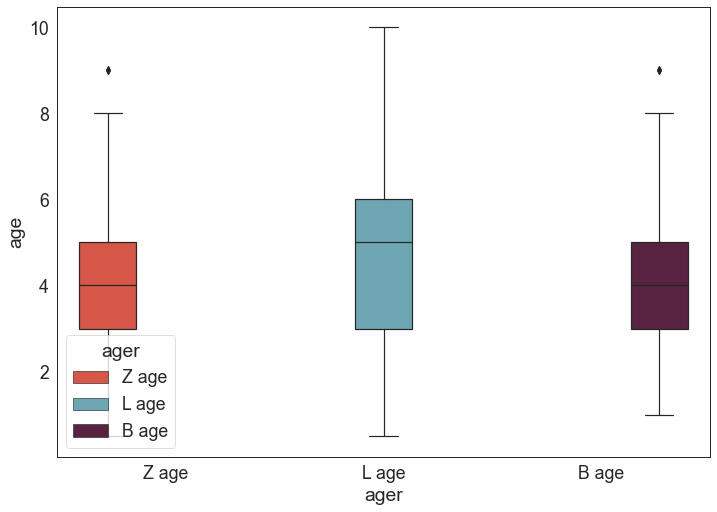

In [70]:
plt.figure(figsize=(11.7, 8.27))

fontdict={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}
sns.set_context('paper', font_scale=2) #this makes the font and scatterpoints much smaller, hence the need for size adjustemnts
sns.set_style('white')

bp=sns.boxplot(x = "ager",
               y = "age",
               hue = "ager",
               data = lampsilis_melt,
#                legend='full', 
               palette=['#EE442F','#63acbe','#601a41'],
#                scatter_kws={"s":100,'alpha':1},
#                line_kws={"lw":2,
#                      'ls':'--'}
               )
fig=bp
# fig.suptitle('Lampsilis teres', style='italic',fontdict=fontdict, color='black', position=(0.5,1.1))


### ANOVA 

#### Import dependencies

In [71]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [72]:
#ANOVA
model = ols('age ~ C(ager)', lampsilis_melt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.486
Date:                Thu, 13 May 2021   Prob (F-statistic):             0.0316
Time:                        14:42:09   Log-Likelihood:                -798.40
No. Observations:                 381   AIC:                             1603.
Df Residuals:                     378   BIC:                             1615.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2047      0.175     23.993      0.000       3.860       4.549
C(ager)[T.L age]     0.4685      0.248      1.890      0.059      -0.019       0.956
C(ager)[T.Z age]    -0.1614      0.248     -0.651      0.515      -0.649       0.326
==============================================================================
Omnibus:                        6.588   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.756
Skew:                           0.314   Prob(JB):                       0.0341
Kurtosis:                       2.822   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 2, 378) =  3.486, p =  0.0316


,sum_sq,df,F,PR(>F)
C(ager),27.192913,2.0,3.48585,0.031616
Residual,1474.377953,378.0,NaN,NaN


### Perform tukey HSD (multiple pairwise comparison)

In [74]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=lampsilis_melt, res_var='age', xfac_var='ager', anova_model='age ~ C(ager)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Z age,L age,0.629921,0.046732,1.213110,3.594427,0.030651
1,Z age,B age,0.161417,-0.421772,0.744607,0.921072,0.771489
2,L age,B age,0.468504,-0.114685,1.051693,2.673355,0.142912


### Test ANOVA assumptions

### Distribution

#### QQ-plot

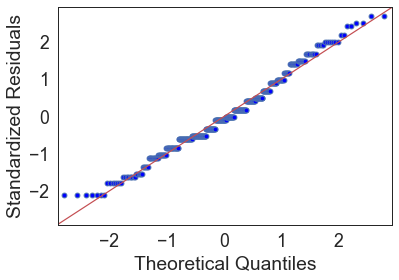

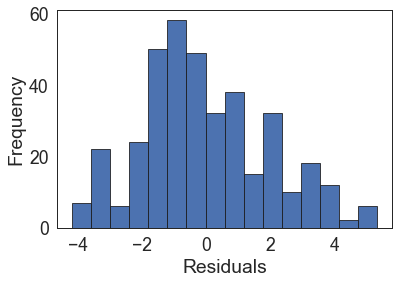

In [75]:
#res.anova_std_residuals are standardized residuals obtained from ANOVA 
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
#histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

#### Shapiro-Wilk Test

In [76]:
### Normality Assumption check
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

NameError: name 'stats' is not defined

#### The p value is significant (<0.05), we fail to reject alternate hypothesis and conclude that agers do not have equal variances.

### Homogeneity 

#### Levene's test to check homogeneity of variances

In [77]:
from bioinfokit.analys import stat 

In [78]:
res = stat()
res.levene(df=lampsilis_melt, res_var='age', xfac_var='ager')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.6368
1,Degrees of freedom (Df),2.0000
2,p value,0.5296


#### p-value >0.05 for all density groups. Hence, we can conclude that groups have equal variances.

### Pairwise comparison *Amblema plicata* agers

#### generate a boxplot to see the data distribution by agers-easy way to detect the differences 


### ANOVA 

#### Import dependencies

In [80]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [81]:
amblema.head()

,Genus,Species,Sample ID,Species Code,Site,River,Basin,Lat,Long,Date Collected,Length (mm),Status Upon Collection,Final Age,Age dif,L age,B age,K&M Age,M age
0,Amblema,plicata,5,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,77.0,Alive,14.0,NaN,14.0,14.0,14,12.0
2,Amblema,plicata,7,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,82.5,Alive,14.0,1.0,14.0,13.0,15,11.0
3,Amblema,plicata,8,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,75.5,Alive,7.0,2.0,9.0,7.0,12,9.0
4,Amblema,plicata,9,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,78.5,Alive,10.0,1.0,11.0,10.0,11,11.0
5,Amblema,plicata,10,D,"Gonzales, TX",Guadalupe,Guadalupe,29.493646°,-97.431293°,2019-09-24,69.0,Alive,10.0,1.0,10.0,9.0,11,11.0


In [82]:
amblema.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 321
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Genus                   180 non-null    object        
 1   Species                 180 non-null    object        
 2   Sample ID               180 non-null    int64         
 3   Species Code            180 non-null    object        
 4   Site                    180 non-null    object        
 5   River                   180 non-null    object        
 6   Basin                   180 non-null    object        
 7   Lat                     180 non-null    object        
 8   Long                    180 non-null    object        
 9   Date Collected          180 non-null    datetime64[ns]
 10  Length (mm)             180 non-null    float64       
 11  Status Upon Collection  180 non-null    object        
 12  Final Age               180 non-null    float64   

In [83]:
#ANOVA
model = ols('age ~ C(ager)', amblema_melt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.904
Date:                Thu, 13 May 2021   Prob (F-statistic):            0.00776
Time:                        14:42:20   Log-Likelihood:                -1533.1
No. Observations:                 535   AIC:                             3072.
Df Residuals:                     532   BIC:                             3085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.5278      0.318     42.595      0.000      12.904      14.152
C(ager)[T.L age]     0.0167      0.449      0.037      0.970      -0.866       0.899
C(ager)[T.M age]     1.2379      0.452      2.737      0.006       0.349       2.127
==============================================================================
Omnibus:                       49.369   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.023
Skew:                          -0.749   Prob(JB):                     3.40e-14
Kurtosis:                       3.732   Cond. No.                         3.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 2, 532) =  4.904, p =  0.0078


,sum_sq,df,F,PR(>F)
C(ager),178.064645,2.0,4.903788,0.007757
Residual,9658.899841,532.0,NaN,NaN


### Perform tukey HSD (multiple pairwise comparison)

In [85]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=amblema_melt, res_var='age', xfac_var='ager', anova_model='age ~ C(ager)')
res.tukey_summary


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,L age,M age,1.221270,0.158100,2.284440,3.818209,0.019563
1,L age,B age,0.016667,-1.038990,1.072323,0.052478,0.900000
2,M age,B age,1.237937,0.174766,2.301107,3.870316,0.017599


### Test ANOVA assumptions

### Distribution

#### QQ-plot

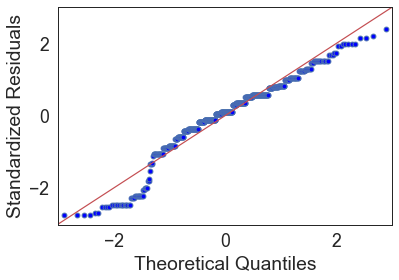

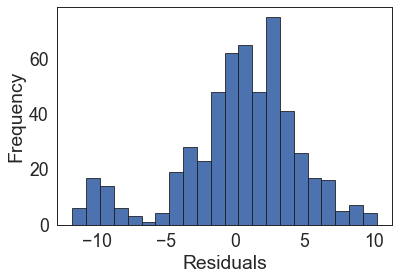

In [86]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [87]:
from bioinfokit.analys import stat

#### Shapiro-Wilk Test

In [88]:
### Normality Assumption check
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

NameError: name 'stats' is not defined

#### The p value is significant (<0.05), we fail to reject the null hypothesis and conclude that agers do not have equal variances.

### Homogeneity 

#### Levene's test to check homogeneity of variances

In [89]:
from bioinfokit.analys import stat 

In [90]:
res = stat()
res.levene(df=amblema_melt, res_var='age', xfac_var='ager')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.3459
1,Degrees of freedom (Df),2.0000
2,p value,0.7078


#### p-value >0.05 for all density groups. Hence, we can conclude that groups have equal variances.

### Linear regression analysis: 

In [91]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Lampsilis OLS

### Z:B 

In [78]:
X=lampsilis_clean["B age"]
y=lampsilis_clean["Z age"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [80]:
X_train_sm = sm.add_constant(X_train)

In [81]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const   -0.172124
B age    1.004525
dtype: float64

In [82]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Z age   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     400.8
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           4.01e-34
Time:                        10:17:49   Log-Likelihood:                -110.97
No. Observations:                  88   AIC:                             225.9
Df Residuals:                      86   BIC:                             230.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1721      0.227     -0.758      0.450      -0.624       0.279
B age          1.0045      0.050     20.019      0.000       0.905       1.104
==============================================================================
Omnibus:                        9.818   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               24.804
Skew:                          -0.007   Prob(JB):                     4.11e-06
Kurtosis:                       5.601   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     814.7
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.15e-82
Time:                        10:31:47   Log-Likelihood:                -370.13
No. Observations:                 266   AIC:                             744.3
Df Residuals:                     264   BIC:                             751.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4039      0.149      2.716      0.0

In [100]:
# age = -0.2919	+ 1.0246 * avg_age

### Z:L 

In [188]:
X=lampsilis_clean["Z age"]
y=lampsilis_clean["L age"]

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [190]:
X_train_sm = sm.add_constant(X_train)

In [191]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const    1.458222
Z age    0.779391
dtype: float64

In [192]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  L age   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           6.88e-20
Time:                        11:56:09   Log-Likelihood:                -143.29
No. Observations:                  88   AIC:                             290.6
Df Residuals:                      86   BIC:                             295.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4582      0.293      4.984      0.000       0.877       2.040
Z age          0.7794      0.065     11.910      0.000       0.649       0.909
==============================================================================
Omnibus:                       10.333   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.690
Skew:                           0.698   Prob(JB):                      0.00477
Kurtosis:                       3.984   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### B:L 

In [88]:
X=lampsilis_clean["B age"]
y=lampsilis_clean["L age"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
X_train_sm = sm.add_constant(X_train)

In [91]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const    0.713842
B age    0.930445
dtype: float64

In [92]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  L age   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     225.5
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           9.22e-26
Time:                        10:20:00   Log-Likelihood:                -129.53
No. Observations:                  88   AIC:                             263.1
Df Residuals:                      86   BIC:                             268.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7138      0.280      2.546      0.013       0.156       1.271
B age          0.9304      0.062     15.018      0.000       0.807       1.054
==============================================================================
Omnibus:                       17.709   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.583
Skew:                           0.905   Prob(JB):                     4.59e-06
Kurtosis:                       4.851   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### All agers

In [93]:
X=lampsilis_melt["Final Age"]
y=lampsilis_melt["age"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [95]:
X_train_sm = sm.add_constant(X_train)

In [96]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const        0.403877
Final Age    0.905448
dtype: float64

In [97]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     814.7
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           1.15e-82
Time:                        10:20:32   Log-Likelihood:                -370.13
No. Observations:                 266   AIC:                             744.3
Df Residuals:                     264   BIC:                             751.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4039      0.149      2.716      0.007       0.111       0.697
Final Age      0.9054      0.032     28.542      0.000       0.843       0.968
==============================================================================
Omnibus:                       22.538   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.647
Skew:                           0.049   Prob(JB):                     9.28e-20
Kurtosis:                       5.810   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plicata OLS regressions

### L:B 

In [156]:
X=amblema["L age"]
y=amblema["B age"]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [158]:
X_train_sm = sm.add_constant(X_train)

In [159]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const    0.754120
L age    0.953838
dtype: float64

In [160]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  B age   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1499.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           8.39e-92
Time:                        11:38:55   Log-Likelihood:                -318.01
No. Observations:                 191   AIC:                             640.0
Df Residuals:                     189   BIC:                             646.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7541      0.351      2.150      0.033       0.062       1.446
L age          0.9538      0.025     38.719      0.000       0.905       1.002
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.284
Skew:                          -0.129   Prob(JB):                        0.319
Kurtosis:                       3.469   Cond. No.                         53.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### L:M 

In [178]:
X=amblema["L age"]
y=amblema["M age"]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [180]:
X_train_sm = sm.add_constant(X_train)

In [181]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const    4.323081
L age    0.783483
dtype: float64

In [182]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  M age   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     178.4
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           4.39e-29
Time:                        11:50:16   Log-Likelihood:                -483.74
No. Observations:                 191   AIC:                             971.5
Df Residuals:                     189   BIC:                             978.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3231      0.835      5.176      0.000       2.675       5.971
L age          0.7835      0.059     13.355      0.000       0.668       0.899
==============================================================================
Omnibus:                        5.690   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.765
Skew:                           0.296   Prob(JB):                       0.0560
Kurtosis:                       3.611   Cond. No.                         53.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### M:B 

In [183]:
X=amblema["M age"]
y=amblema["B age"]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [185]:
X_train_sm = sm.add_constant(X_train)

In [186]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const    4.161865
M age    0.642390
dtype: float64

In [187]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  B age   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     196.1
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           4.93e-31
Time:                        11:51:14   Log-Likelihood:                -459.14
No. Observations:                 191   AIC:                             922.3
Df Residuals:                     189   BIC:                             928.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1619      0.719      5.792      0.000       2.744       5.579
M age          0.6424      0.046     14.005      0.000       0.552       0.733
==============================================================================
Omnibus:                        0.736   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.742
Skew:                          -0.147   Prob(JB):                        0.690
Kurtosis:                       2.921   Cond. No.                         58.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### all agers

In [193]:
X=amblema_melt["Final Age"]
y=amblema_melt["age"]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [195]:
X_train_sm = sm.add_constant(X_train)

In [196]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const        2.726511
Final Age    0.851416
dtype: float64

In [197]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 22 Jun 2021   Prob (F-statistic):          5.17e-149
Time:                        12:01:39   Log-Likelihood:                -1276.2
No. Observations:                 575   AIC:                             2556.
Df Residuals:                     573   BIC:                             2565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7265      0.342      7.976      0.000       2.055       3.398
Final Age      0.8514      0.024     35.955      0.000       0.805       0.898
==============================================================================
Omnibus:                      283.478   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2505.514
Skew:                           1.981   Prob(JB):                         0.00
Kurtosis:                      12.428   Cond. No.                         53.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

### Compare actual age to predicted age

### Z

### 1) Create training and test data sets:

In [120]:
trainX = np.asarray(lampsilis_clean["Final Age"][:len(lampsilis_clean["Final Age"])]).reshape(-1, 1)
trainY = np.asarray(lampsilis_clean["Z age"][:len(lampsilis_clean["Z age"])]).reshape(-1, 1)
testX = np.asarray(lampsilis_clean["Final Age"][:len(lampsilis_clean["Final Age"])]).reshape(-1, 1)
testY = np.asarray(lampsilis_clean["Z age"][:len(lampsilis_clean["Z age"])]).reshape(-1, 1)

### 2) Construct and fit the OLS (**O**rdinary **L**east **S**quares regression model)

In [121]:
ols_model=sm.OLS(trainY,trainX)
ols_results=ols_model.fit()

### 3) Use fitted model to make predications on the training and testing data sets

In [122]:
y_pred_train=ols_results.predict(trainX)
y_pred_test=ols_results.predict(testX)

### 4) Plot model's performance against the test data set

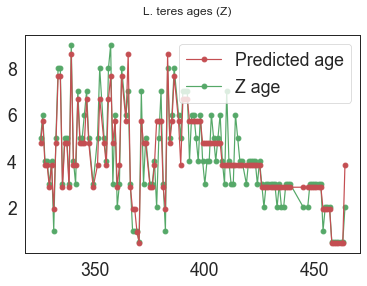

In [123]:
fig=plt.figure()
fig.suptitle("L. teres ages (Z)")
actual, = plt.plot(lampsilis_clean.index,testY,  'go-', label='Z age')
predicted, =plt.plot(lampsilis_clean.index, y_pred_test, 'ro-', label="Predicted age")
plt.legend(handles=[predicted,actual])
plt.show()

In [124]:
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              3583.
Date:                Thu, 13 May 2021   Prob (F-statistic):                    2.07e-94
Time:                        14:48:40   Log-Likelihood:                         -157.28
No. Observations:                 127   AIC:                                      316.6
Df Residuals:                     126   BIC:                                      319.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [125]:
model = linear_model.LinearRegression()
model.fit(trainX, trainY)
predicted = model.predict(testX)
r2_value = model.score(trainX, trainY)
rmsd = np.sqrt(mean_squared_error(testY, predicted))
print("Slope(b1): \n", model.coef_)
print("Y Intercept(b0): \n", model.intercept_)
print("Root Mean Square Deviation: \n", rmsd)
print("R^2 value: \n", r2_value)
# print("Prediction over test data: \n", predicted)
# model.get_params()

NameError: name 'linear_model' is not defined

In [126]:
ols_results.pvalues

array([2.07143372e-94])

### L

In [127]:
trainX = np.asarray(lampsilis_clean["Final Age"][:len(lampsilis_clean["Final Age"])]).reshape(-1, 1)
trainY = np.asarray(lampsilis_clean["L age"][:len(lampsilis_clean["L age"])]).reshape(-1, 1)
testX = np.asarray(lampsilis_clean["Final Age"][:len(lampsilis_clean["Final Age"])]).reshape(-1, 1)
testY = np.asarray(lampsilis_clean["L age"][:len(lampsilis_clean["L age"])]).reshape(-1, 1)

In [128]:
ols_model=sm.OLS(trainY, trainX)
ols_results=ols_model.fit()

In [129]:
y_pred_train=ols_results.predict(trainX)
y_pred_test=ols_results.predict(testX)

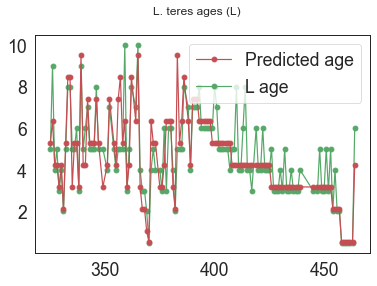

In [130]:
fig2=plt.figure()
fig2.suptitle("L. teres ages (L)")
actual, = plt.plot(lampsilis_clean.index, testY, 'go-', label='L age')
predicted, =plt.plot(lampsilis_clean.index, y_pred_test, 'ro-', label="Predicted age")
plt.legend(handles=[predicted,actual])
plt.show()

In [131]:
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              2089.
Date:                Thu, 13 May 2021   Prob (F-statistic):                    2.71e-80
Time:                        14:49:18   Log-Likelihood:                         -204.60
No. Observations:                 127   AIC:                                      411.2
Df Residuals:                     126   BIC:                                      414.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [132]:
model = linear_model.LinearRegression()
model.fit(trainX, trainY)
predicted = model.predict(testX)
r2_value = model.score(trainX, trainY)
rmsd = np.sqrt(mean_squared_error(testY, predicted))
print("Slope(b1): \n", model.coef_)
print("Y Intercept(b0): \n", model.intercept_)
print("Root Mean Square Deviation: \n", rmsd)
print("R^2 value: \n", r2_value)
# print("Prediction over test data: \n", predicted)
# model.get_params()


NameError: name 'linear_model' is not defined

In [133]:
ols_results.pvalues

array([2.70697374e-80])

### B

In [134]:
trainX = np.asarray(lampsilis_clean["Final Age"][:len(lampsilis_clean["Final Age"])]).reshape(-1, 1)
trainY = np.asarray(lampsilis_clean["B age"][:len(lampsilis_clean["B age"])]).reshape(-1, 1)
testX = np.asarray(lampsilis_clean["Final Age"][:len(lampsilis_clean["Final Age"])]).reshape(-1, 1)
testY = np.asarray(lampsilis_clean["B age"][:len(lampsilis_clean["B age"])]).reshape(-1, 1)

In [135]:
ols_model=sm.OLS(trainY, trainX)
ols_results=ols_model.fit()

In [136]:
y_pred_train=ols_results.predict(trainX)
y_pred_test=ols_results.predict(testX)

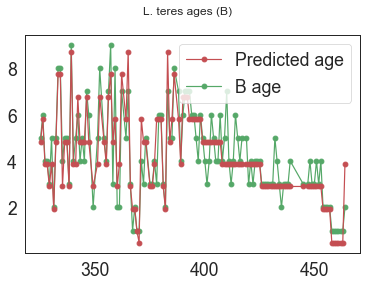

In [137]:
fig3=plt.figure()
fig3.suptitle("L. teres ages (B)")
actual, = plt.plot(lampsilis_clean.index, testY, 'go-', label='B age')
predicted, =plt.plot(lampsilis_clean.index, y_pred_test, 'ro-', label="Predicted age")
plt.legend(handles=[predicted,actual])
plt.show()

In [138]:
model = linear_model.LinearRegression()
model.fit(trainX, trainY)
predicted = model.predict(testX)
r2_value = model.score(trainX, trainY)
rmsd = np.sqrt(mean_squared_error(testY, predicted))
print("Slope(b1): \n", model.coef_)
print("Y Intercept(b0): \n", model.intercept_)
print("Root Mean Square Deviation: \n", rmsd)
print("R^2 value: \n", r2_value)
# print("Prediction over test data: \n", predicted)
# model.get_params()


NameError: name 'linear_model' is not defined

In [139]:
ols_results.pvalues

array([7.28282048e-91])

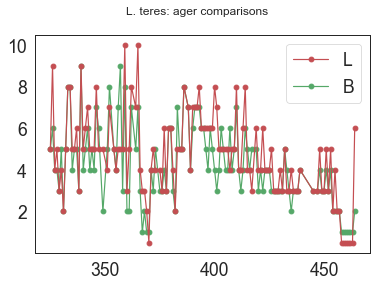

In [140]:
fig3=plt.figure()
fig3.suptitle("L. teres: ager comparisons")
actual, = plt.plot(lampsilis_clean.index, lampsilis_clean["B age"], 'go-', label='B')
predicted, =plt.plot(lampsilis_clean.index, lampsilis_clean["L age"], 'ro-', label="L")
plt.legend(handles=[predicted,actual])
plt.show()

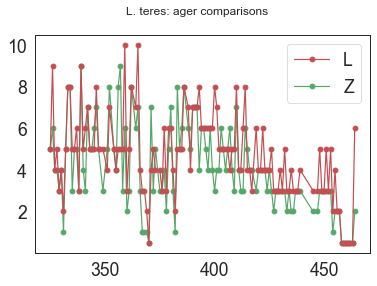

In [141]:
fig4=plt.figure()
fig4.suptitle("L. teres: ager comparisons")
actual, = plt.plot(lampsilis_clean.index, lampsilis_clean["Z age"], 'go-', label='Z')
predicted, =plt.plot(lampsilis_clean.index, lampsilis_clean["L age"], 'ro-', label="L")
plt.legend(handles=[predicted,actual])
plt.show()

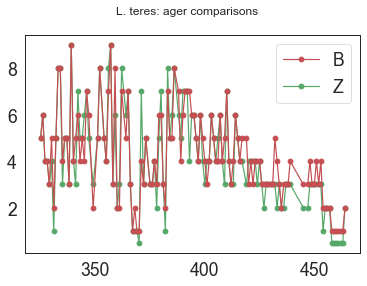

In [142]:
fig3=plt.figure()
fig3.suptitle("L. teres: ager comparisons")
actual, = plt.plot(lampsilis_clean.index, lampsilis_clean["Z age"], 'go-', label='Z')
predicted, =plt.plot(lampsilis_clean.index, lampsilis_clean["B age"], 'ro-', label="B")
plt.legend(handles=[predicted,actual])
plt.show()